In [1]:
### General import
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
#Chargement du jeu de données
cov = pd.read_csv('train_target.csv',parse_dates=['date'], index_col='date')
cov.head(5)

,Unnamed: 0,target_Afghanistan,target_Albania,target_Algeria,target_Andorra,target_Argentina,target_Armenia,target_Australia,target_Austria,target_Azerbaijan,...,target_Taiwan*,target_Thailand,target_Togo,target_Tunisia,target_Turkey,target_US,target_Ukraine,target_United Arab Emirates,target_United Kingdom,target_Vietnam
date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-24,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-25,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-26,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
cov.index.name=None

In [ ]:
cov.

# Plotting and understanding a time series

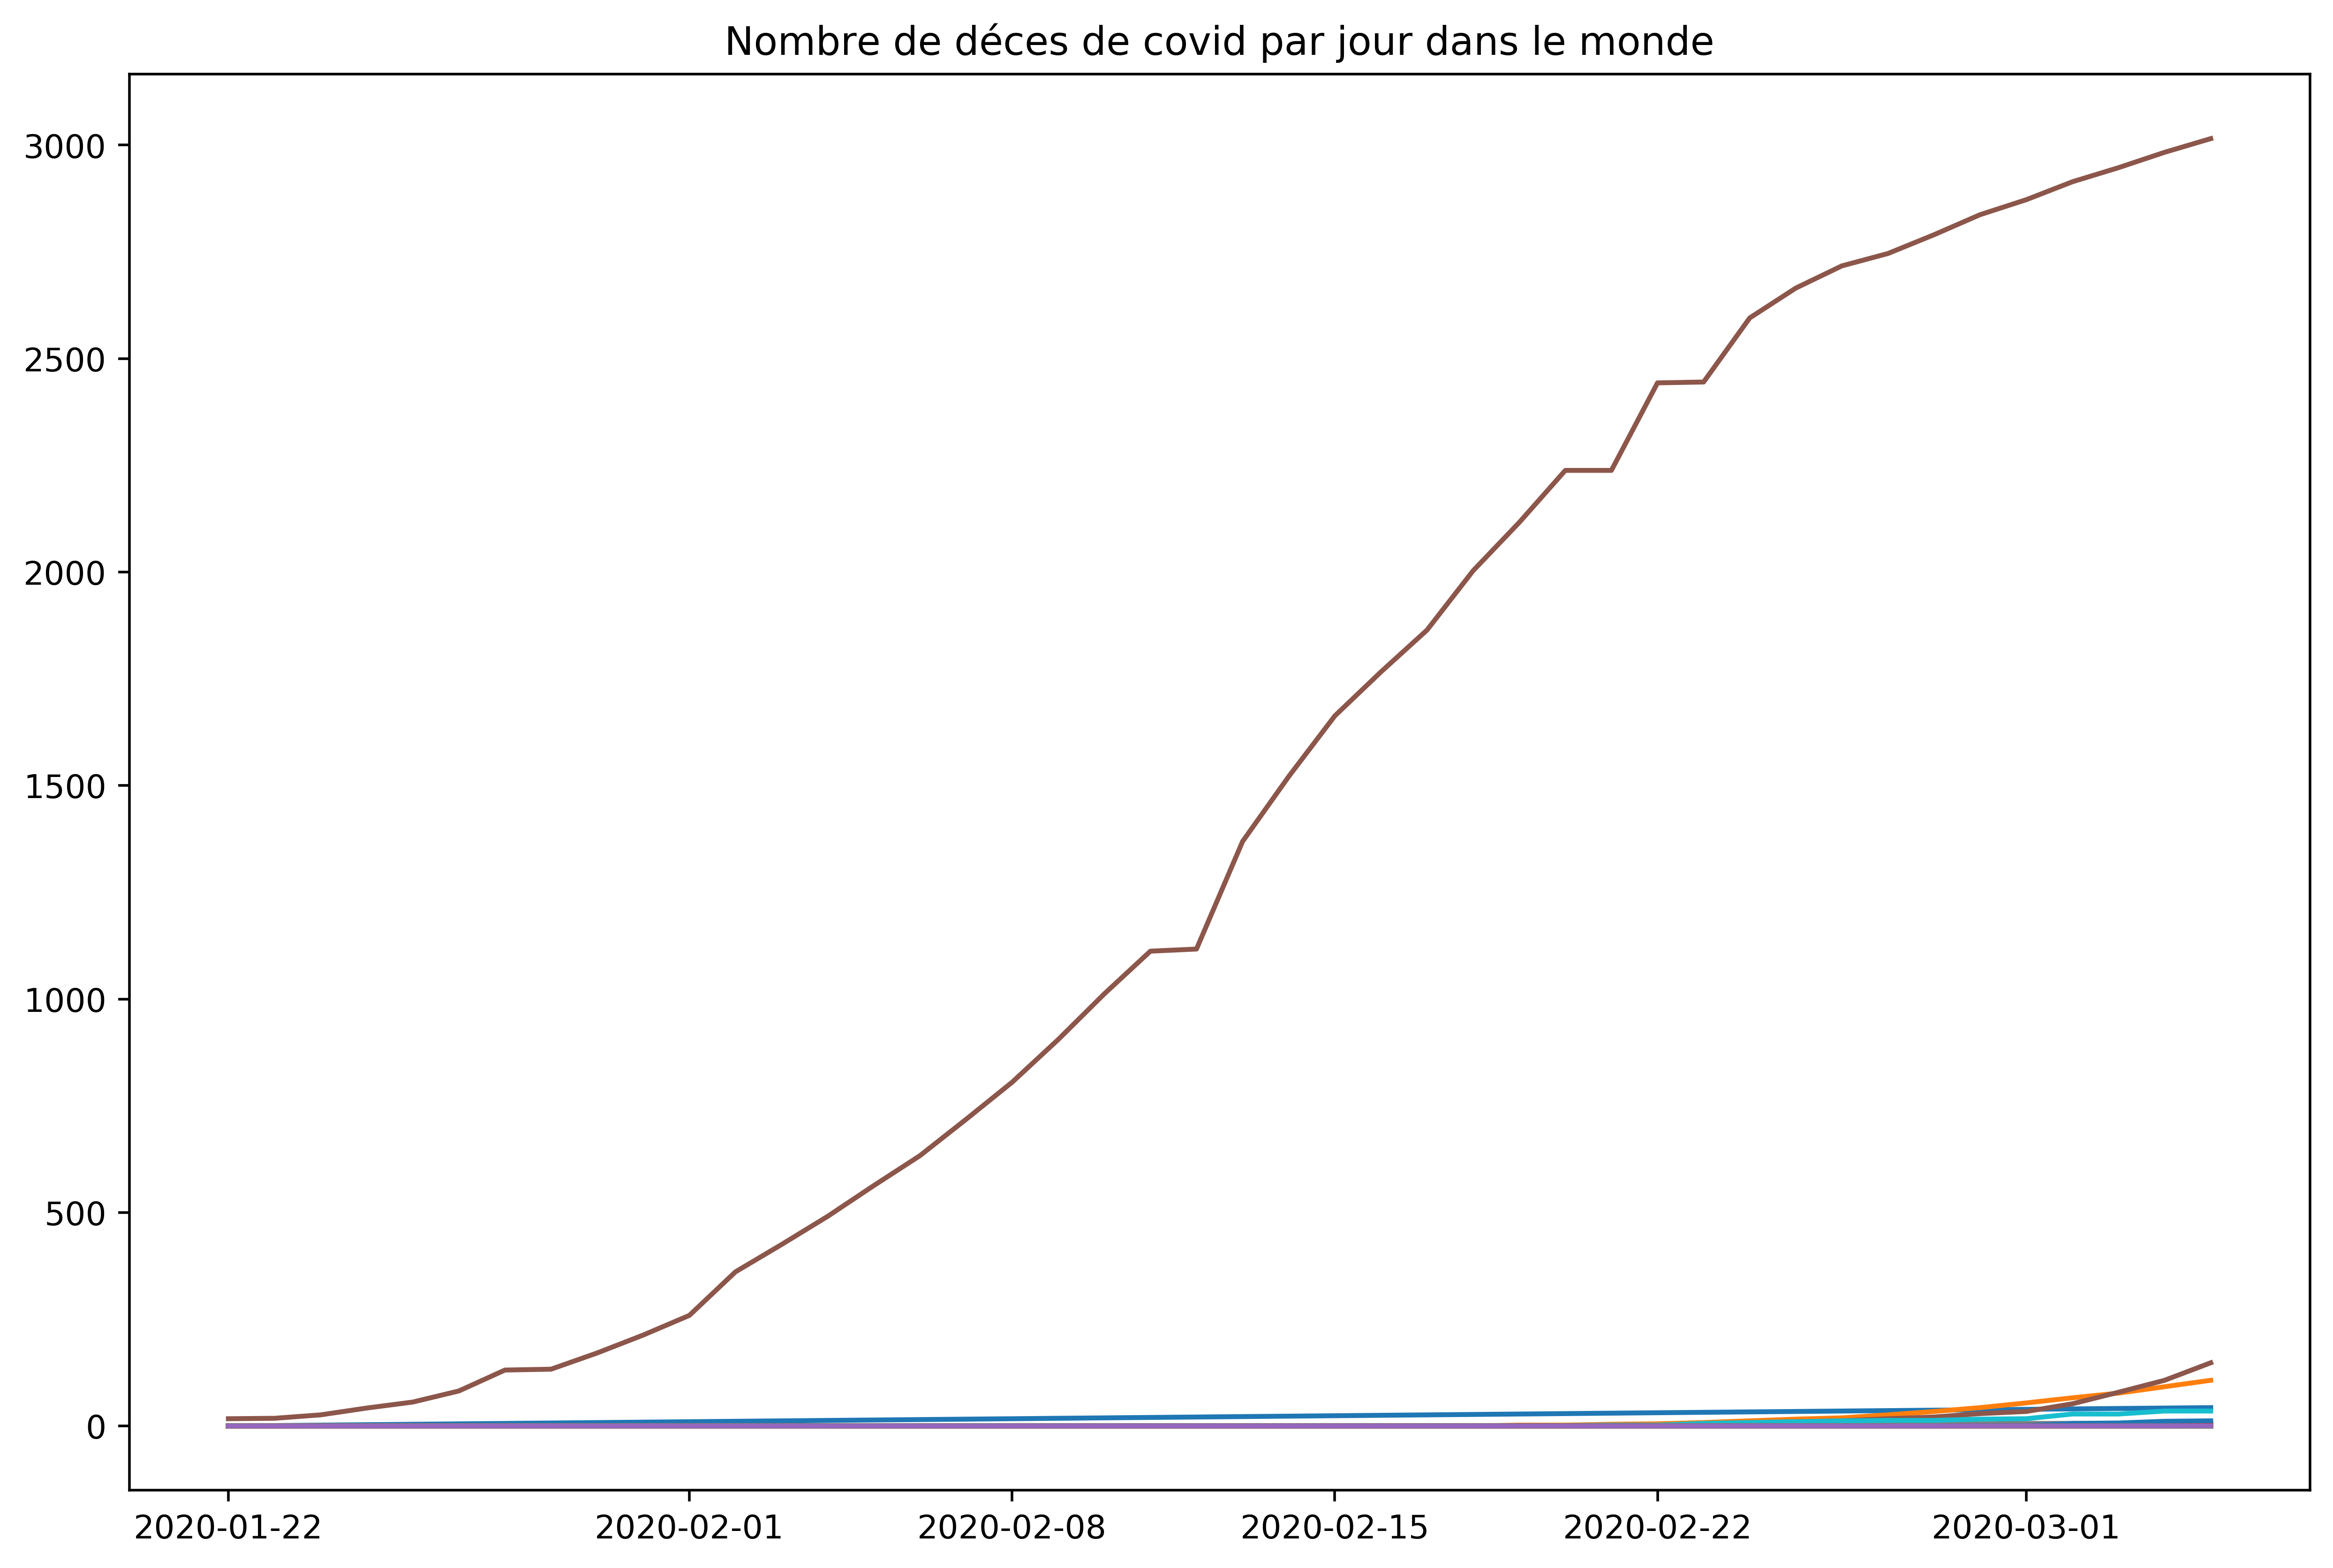

In [23]:

plt.figure(figsize=(12,8),dpi=500)
plt.plot(cov)
plt.title("Nombre de déces de covid par jour dans le monde")
#plt.legend()
plt.savefig("Nombre de déces de covid par jour dans le monde")
plt.show()

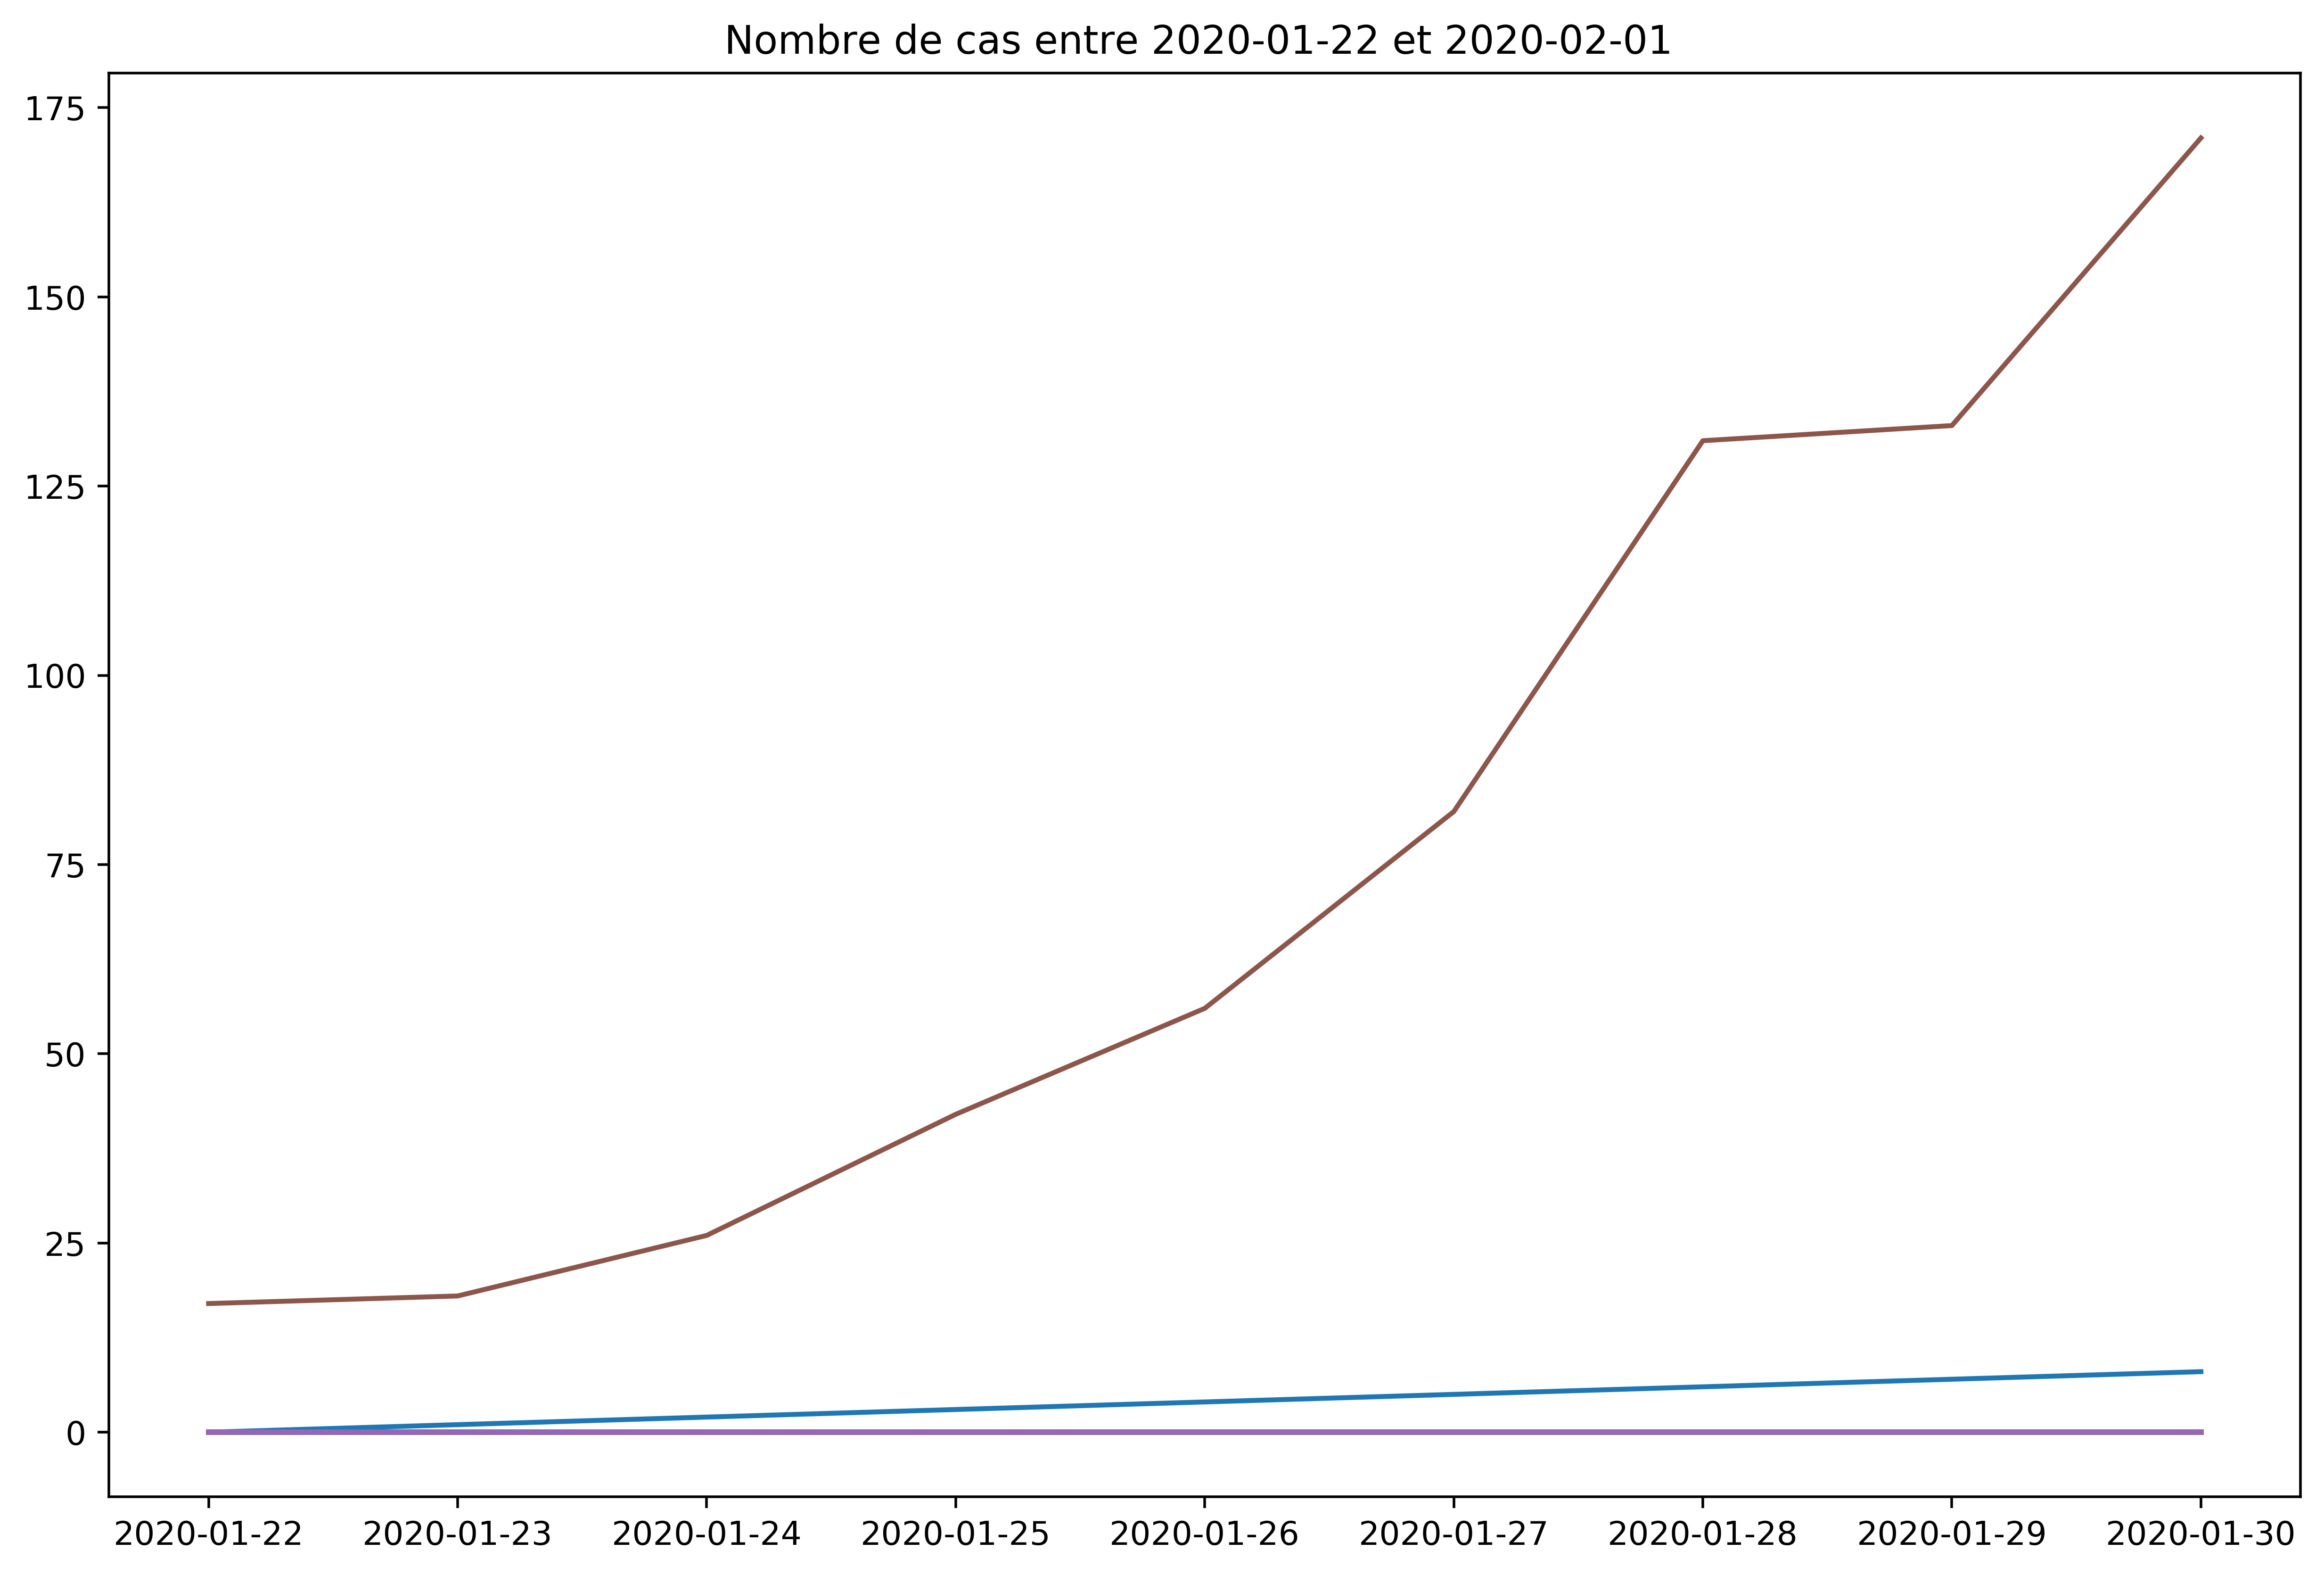

In [24]:
plt.figure(figsize=(12,8),dpi=500)
plt.plot(cov.loc['2020-01-22':'2020-01-30'])
plt.title("Nombre de cas entre 2020-01-22 et 2020-02-01 ")
plt.savefig("Nombre de déces de covid par jour dans le monde entre 2020-01-22 et 2020-02-01 ")
#plt.legend()
plt.show()

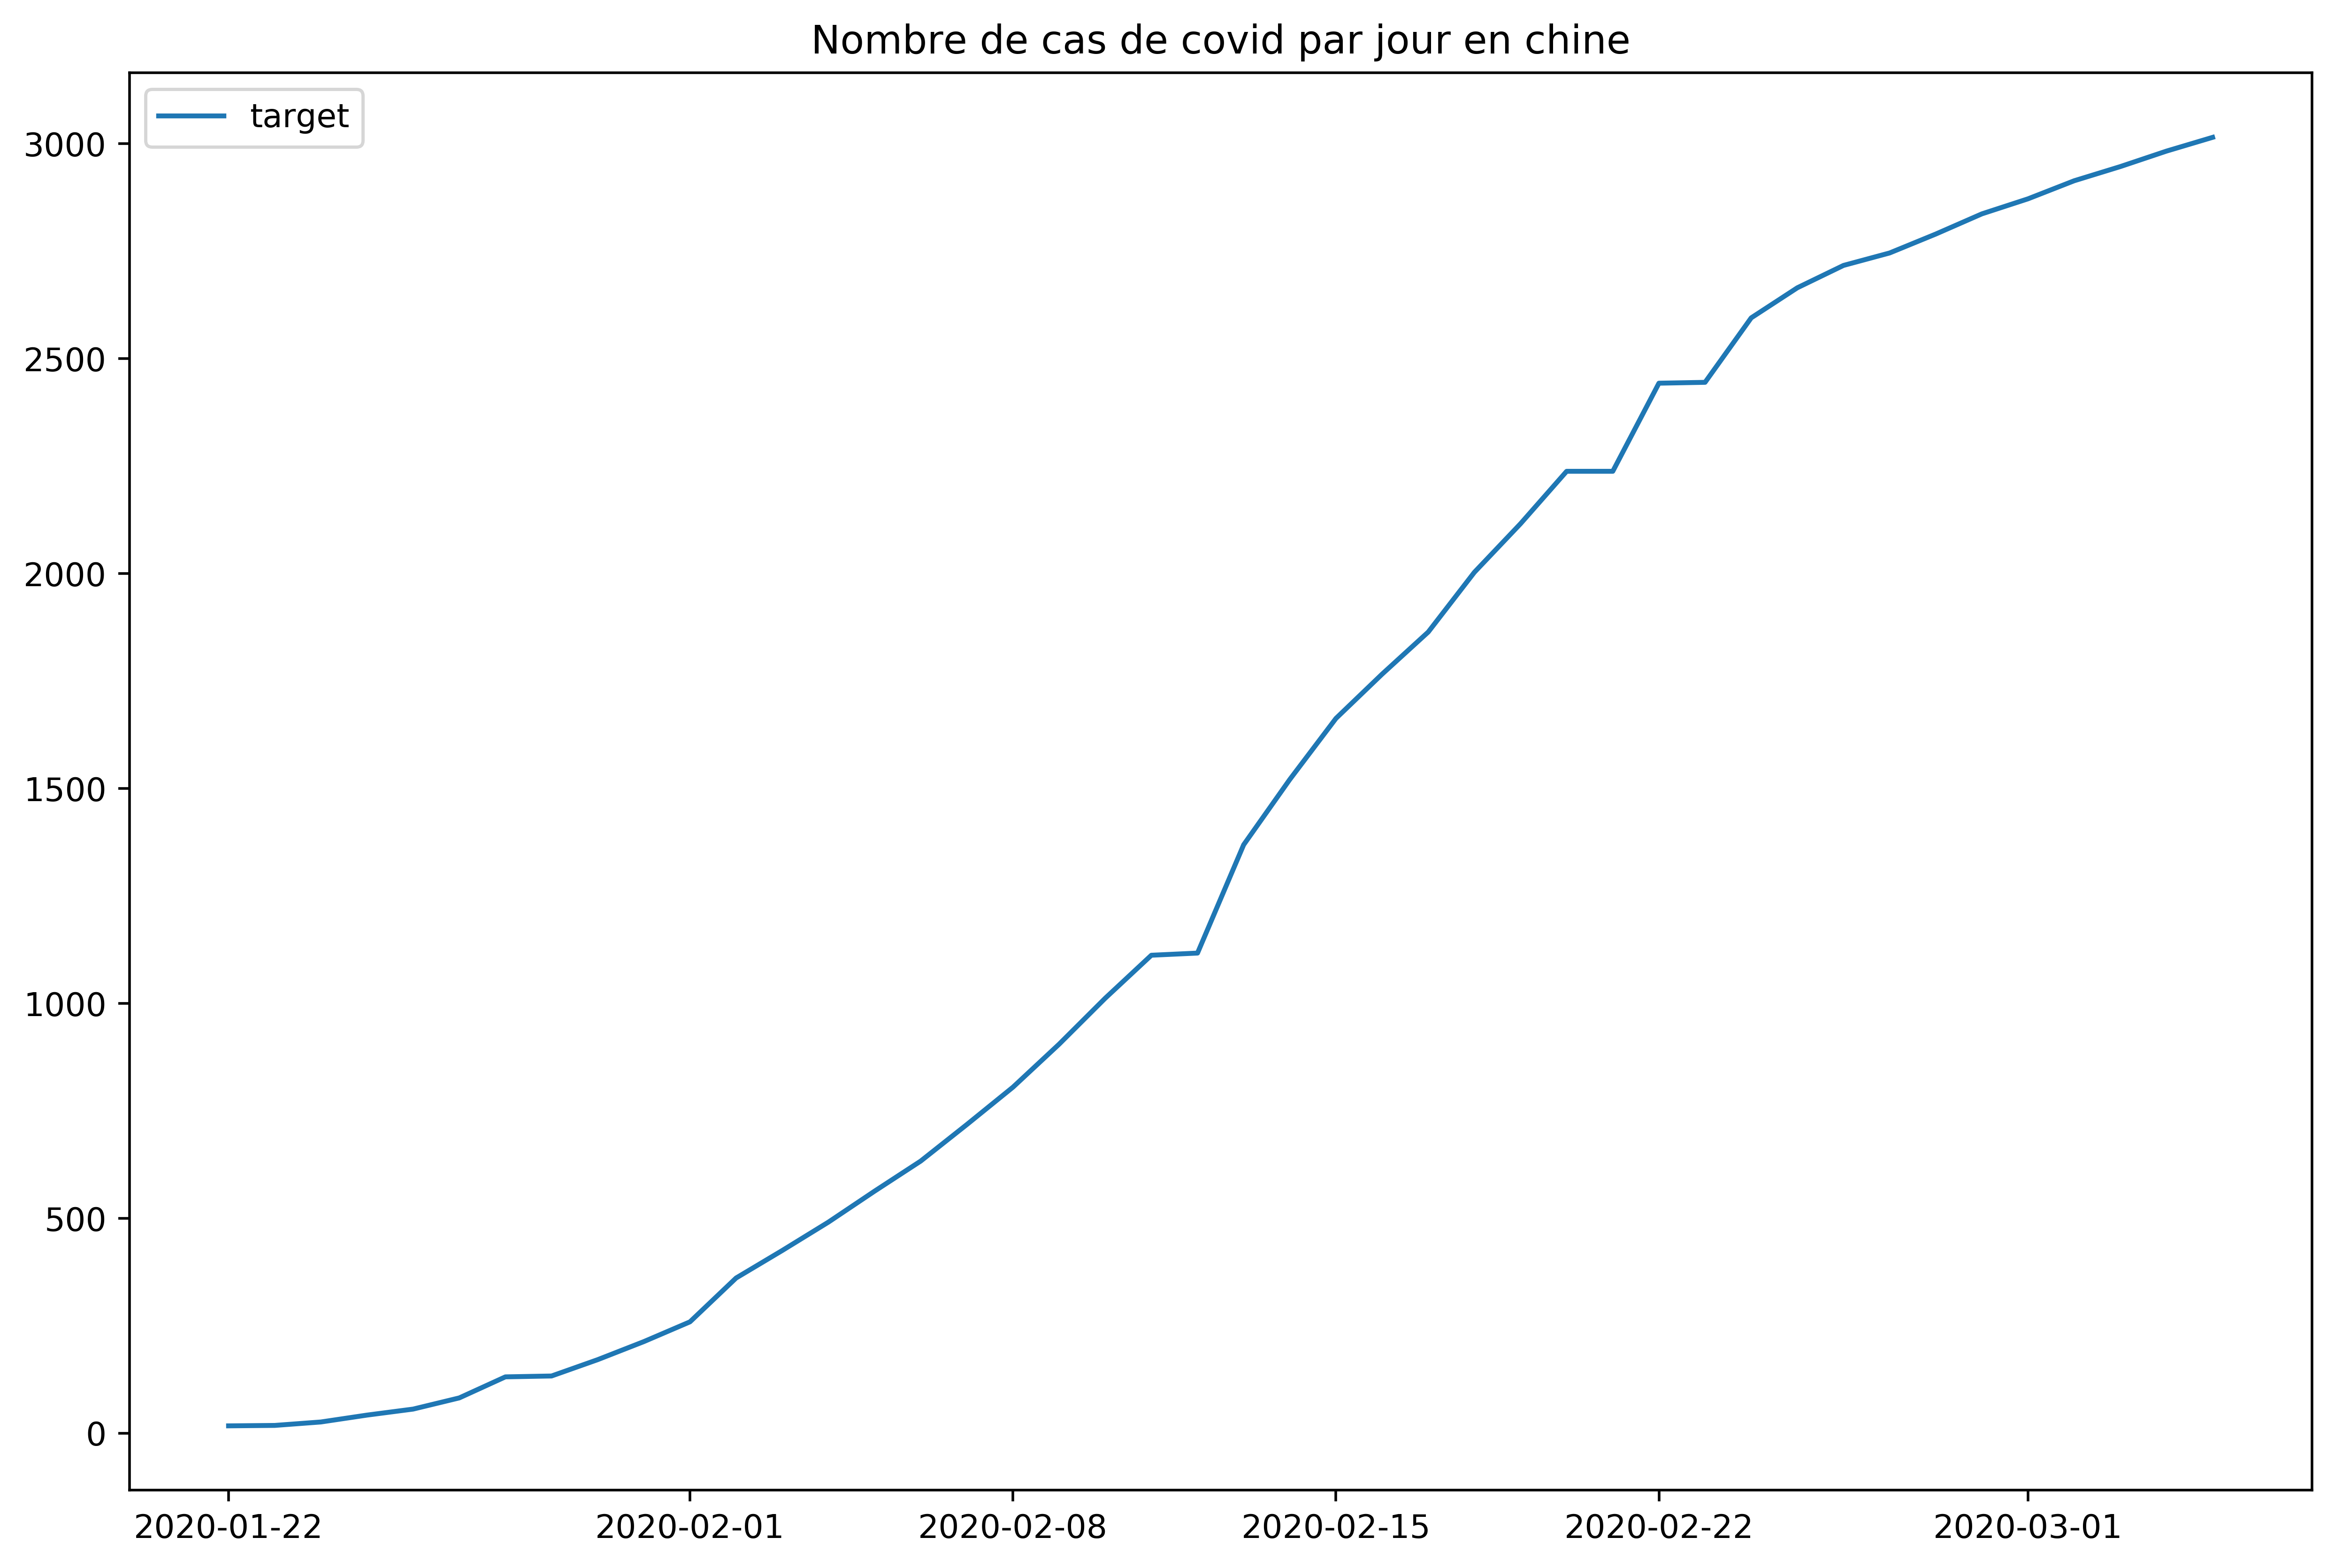

In [25]:
plt.figure(figsize=(12,8),dpi=500)
plt.plot(cov['target_China '], label="target")
plt.title("Nombre de cas de covid par jour en chine")
plt.legend()
plt.savefig("Nombre de cas de covid par jour en chine")
plt.show()

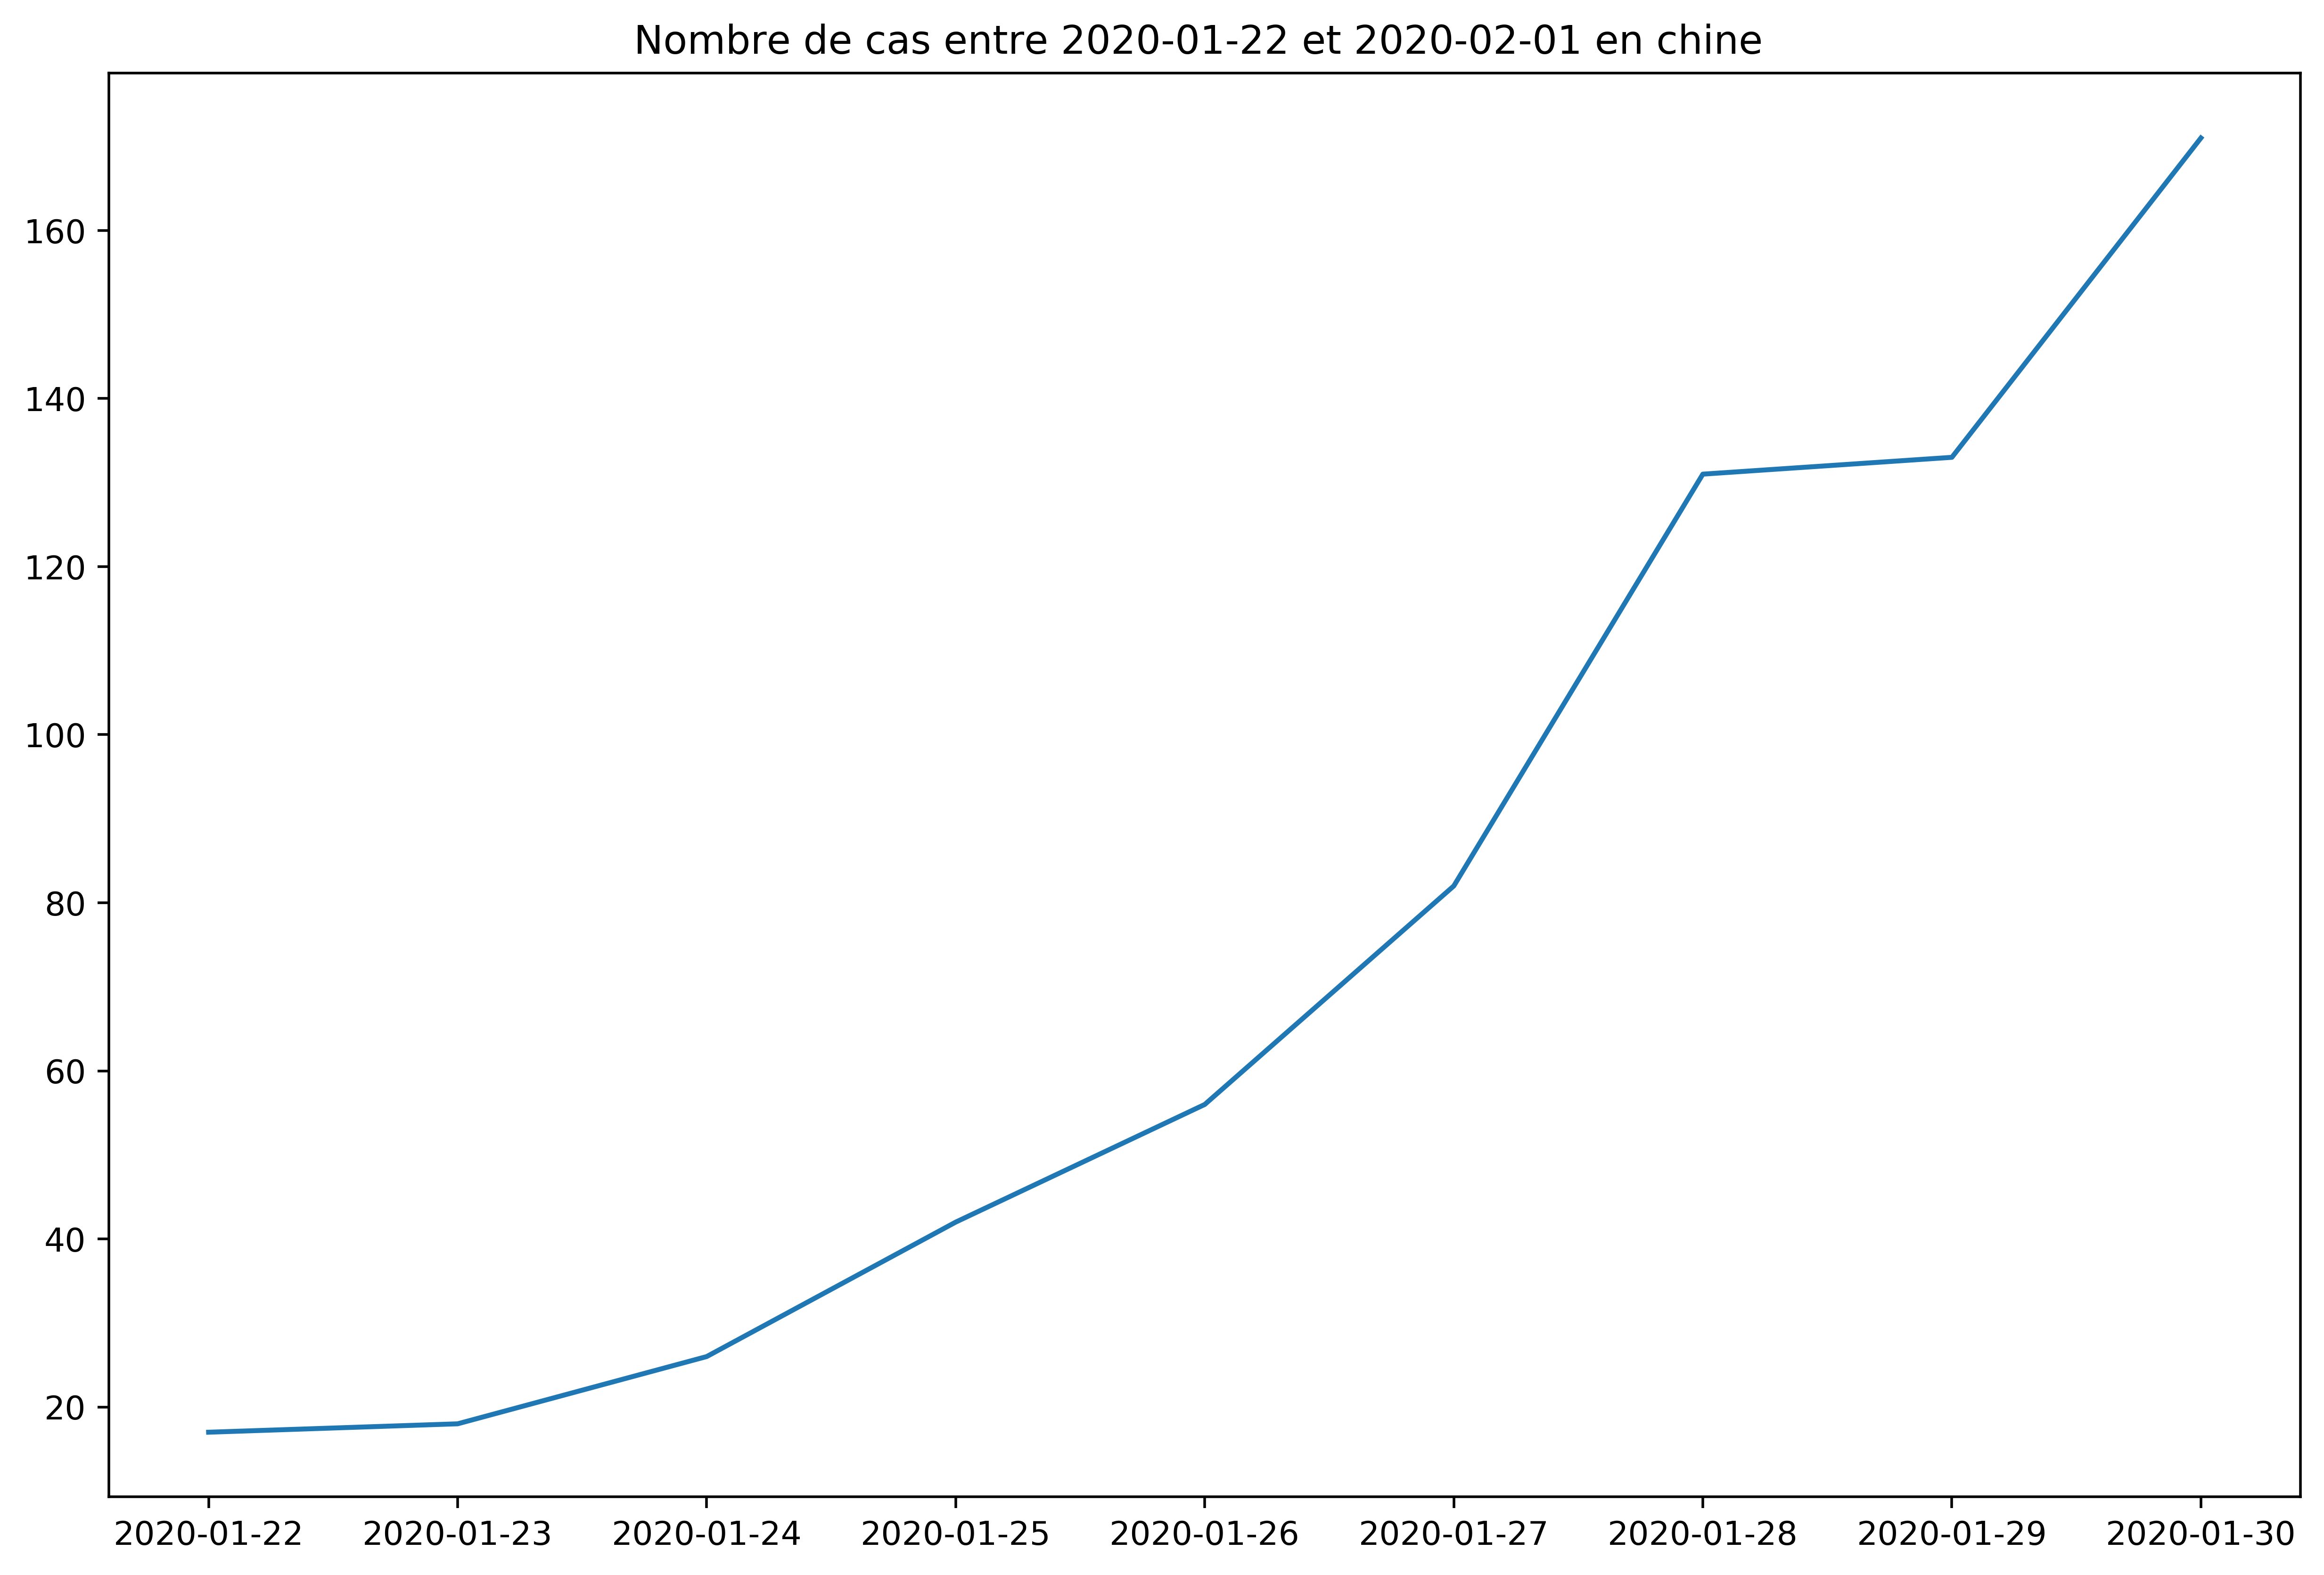

In [26]:
plt.figure(figsize=(12,8),dpi=500)
plt.plot(cov.loc['2020-01-22':'2020-01-30']['target_China '])
plt.title("Nombre de cas entre 2020-01-22 et 2020-02-01 en chine ")
plt.savefig("Nombre de cas entre 2020-01-22 et 2020-02-01 en chine ")
plt.show()

# Auto-correlation and Partial Auto-correlation

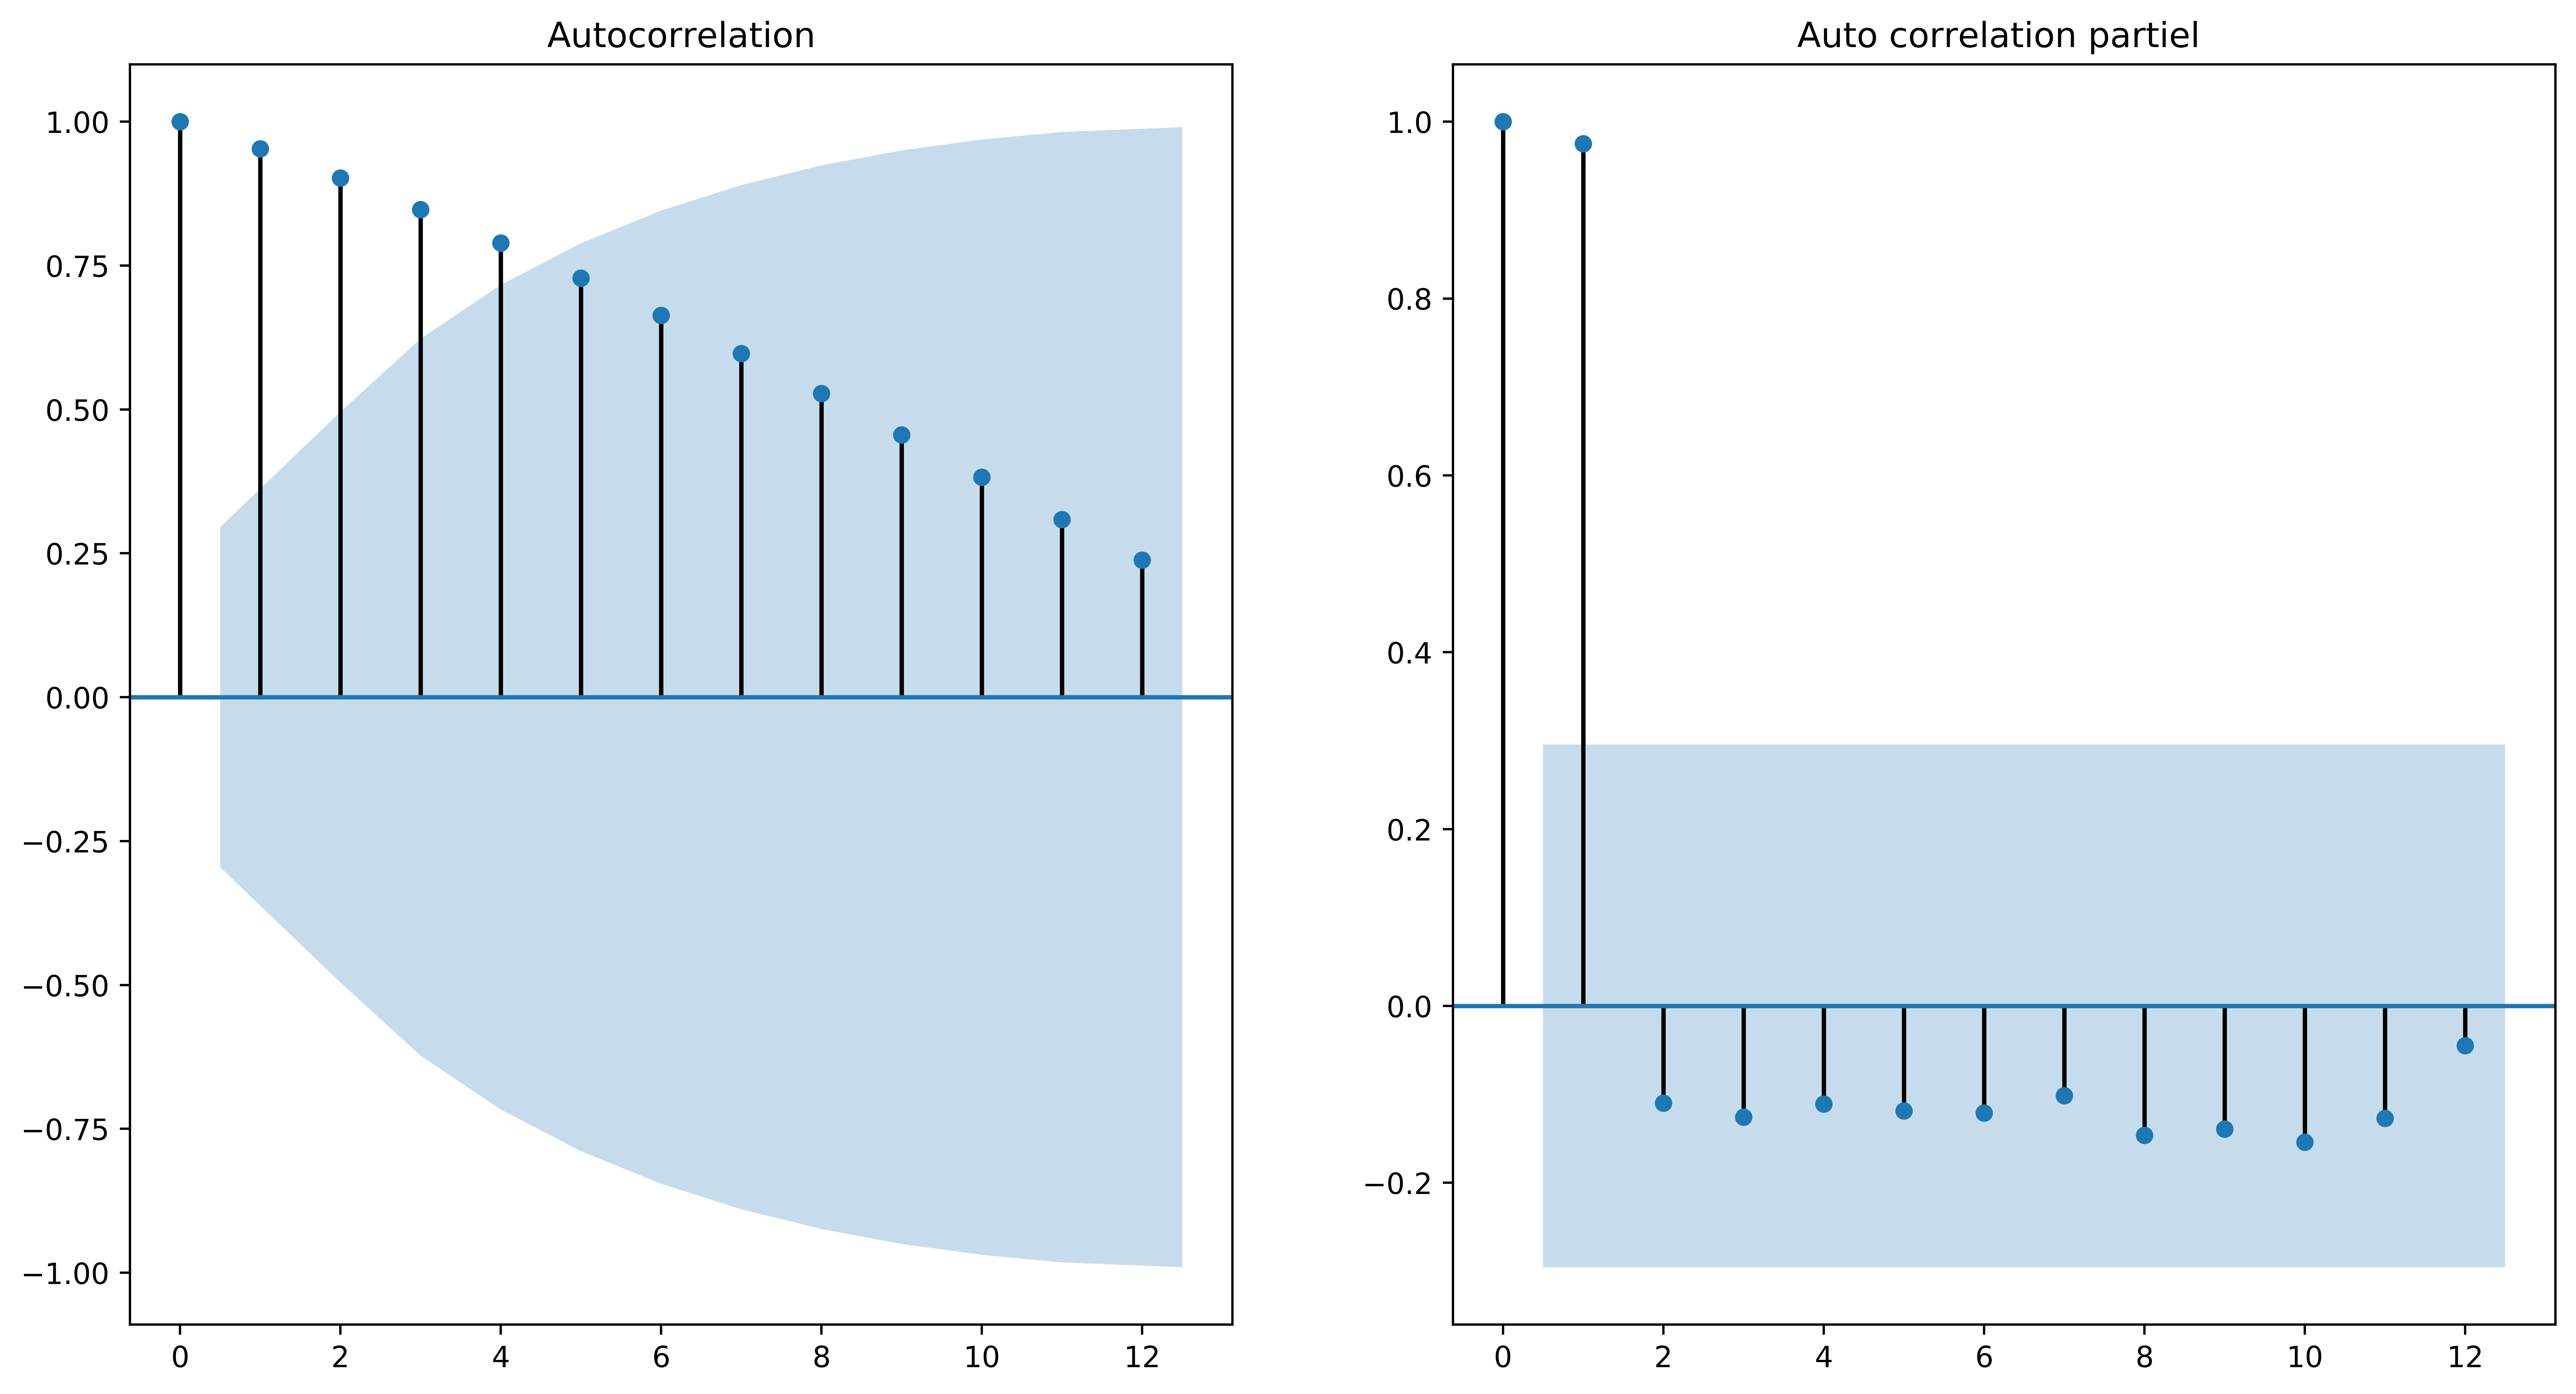

In [27]:
# Auto correlation pariel
import statsmodels.api as sm

fig, axes = plt.subplots(1, 2, figsize=(15,8),dpi=700)

fig = sm.graphics.tsa.plot_acf(cov['target_China '], lags=12, ax=axes[0])
fig = sm.graphics.tsa.plot_pacf(cov['target_China '], lags=12, ax=axes[1])
plt.title("Auto correlation partiel ")
plt.savefig("Auto correlation partiel  ")
plt.show()

 Ces figure montrent clairement que la série est significativement autocorrélée, cela signifie 
que les valeurs précédentes de la série (décalages) peuvent être utiles pour prédire la valeur actuelle. 

# Test for stationarity

In [28]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(cov['target_China '])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.636994
p-value: 0.862402
Critical Values:
	1%: -3.601
	5%: -2.935
	10%: -2.606


Le test montre que la série est saionnaire. C'est a dire que la moyenne et la variance ne change pas avec le temps

# Automatic Decomposition

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(cov['target_China '].ffill(axis=0), period=12, extrapolate_trend='freq')
print(decomposition)


TypeError: seasonal_decompose() got an unexpected keyword argument 'period'

<Figure size 12600x9800 with 0 Axes>

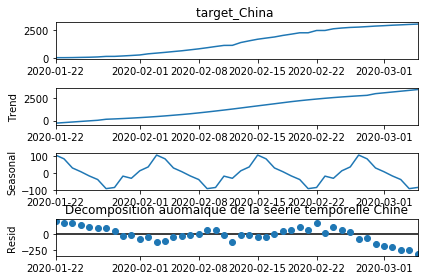

In [10]:
plt.figure(figsize=(18,14),dpi=700)
decomposition.plot()
plt.title("Decomposition auomaique de la séerie temporelle Chine")
plt.savefig("Decomposition auomaique de la séerie temporelle Chine ")
plt.show()

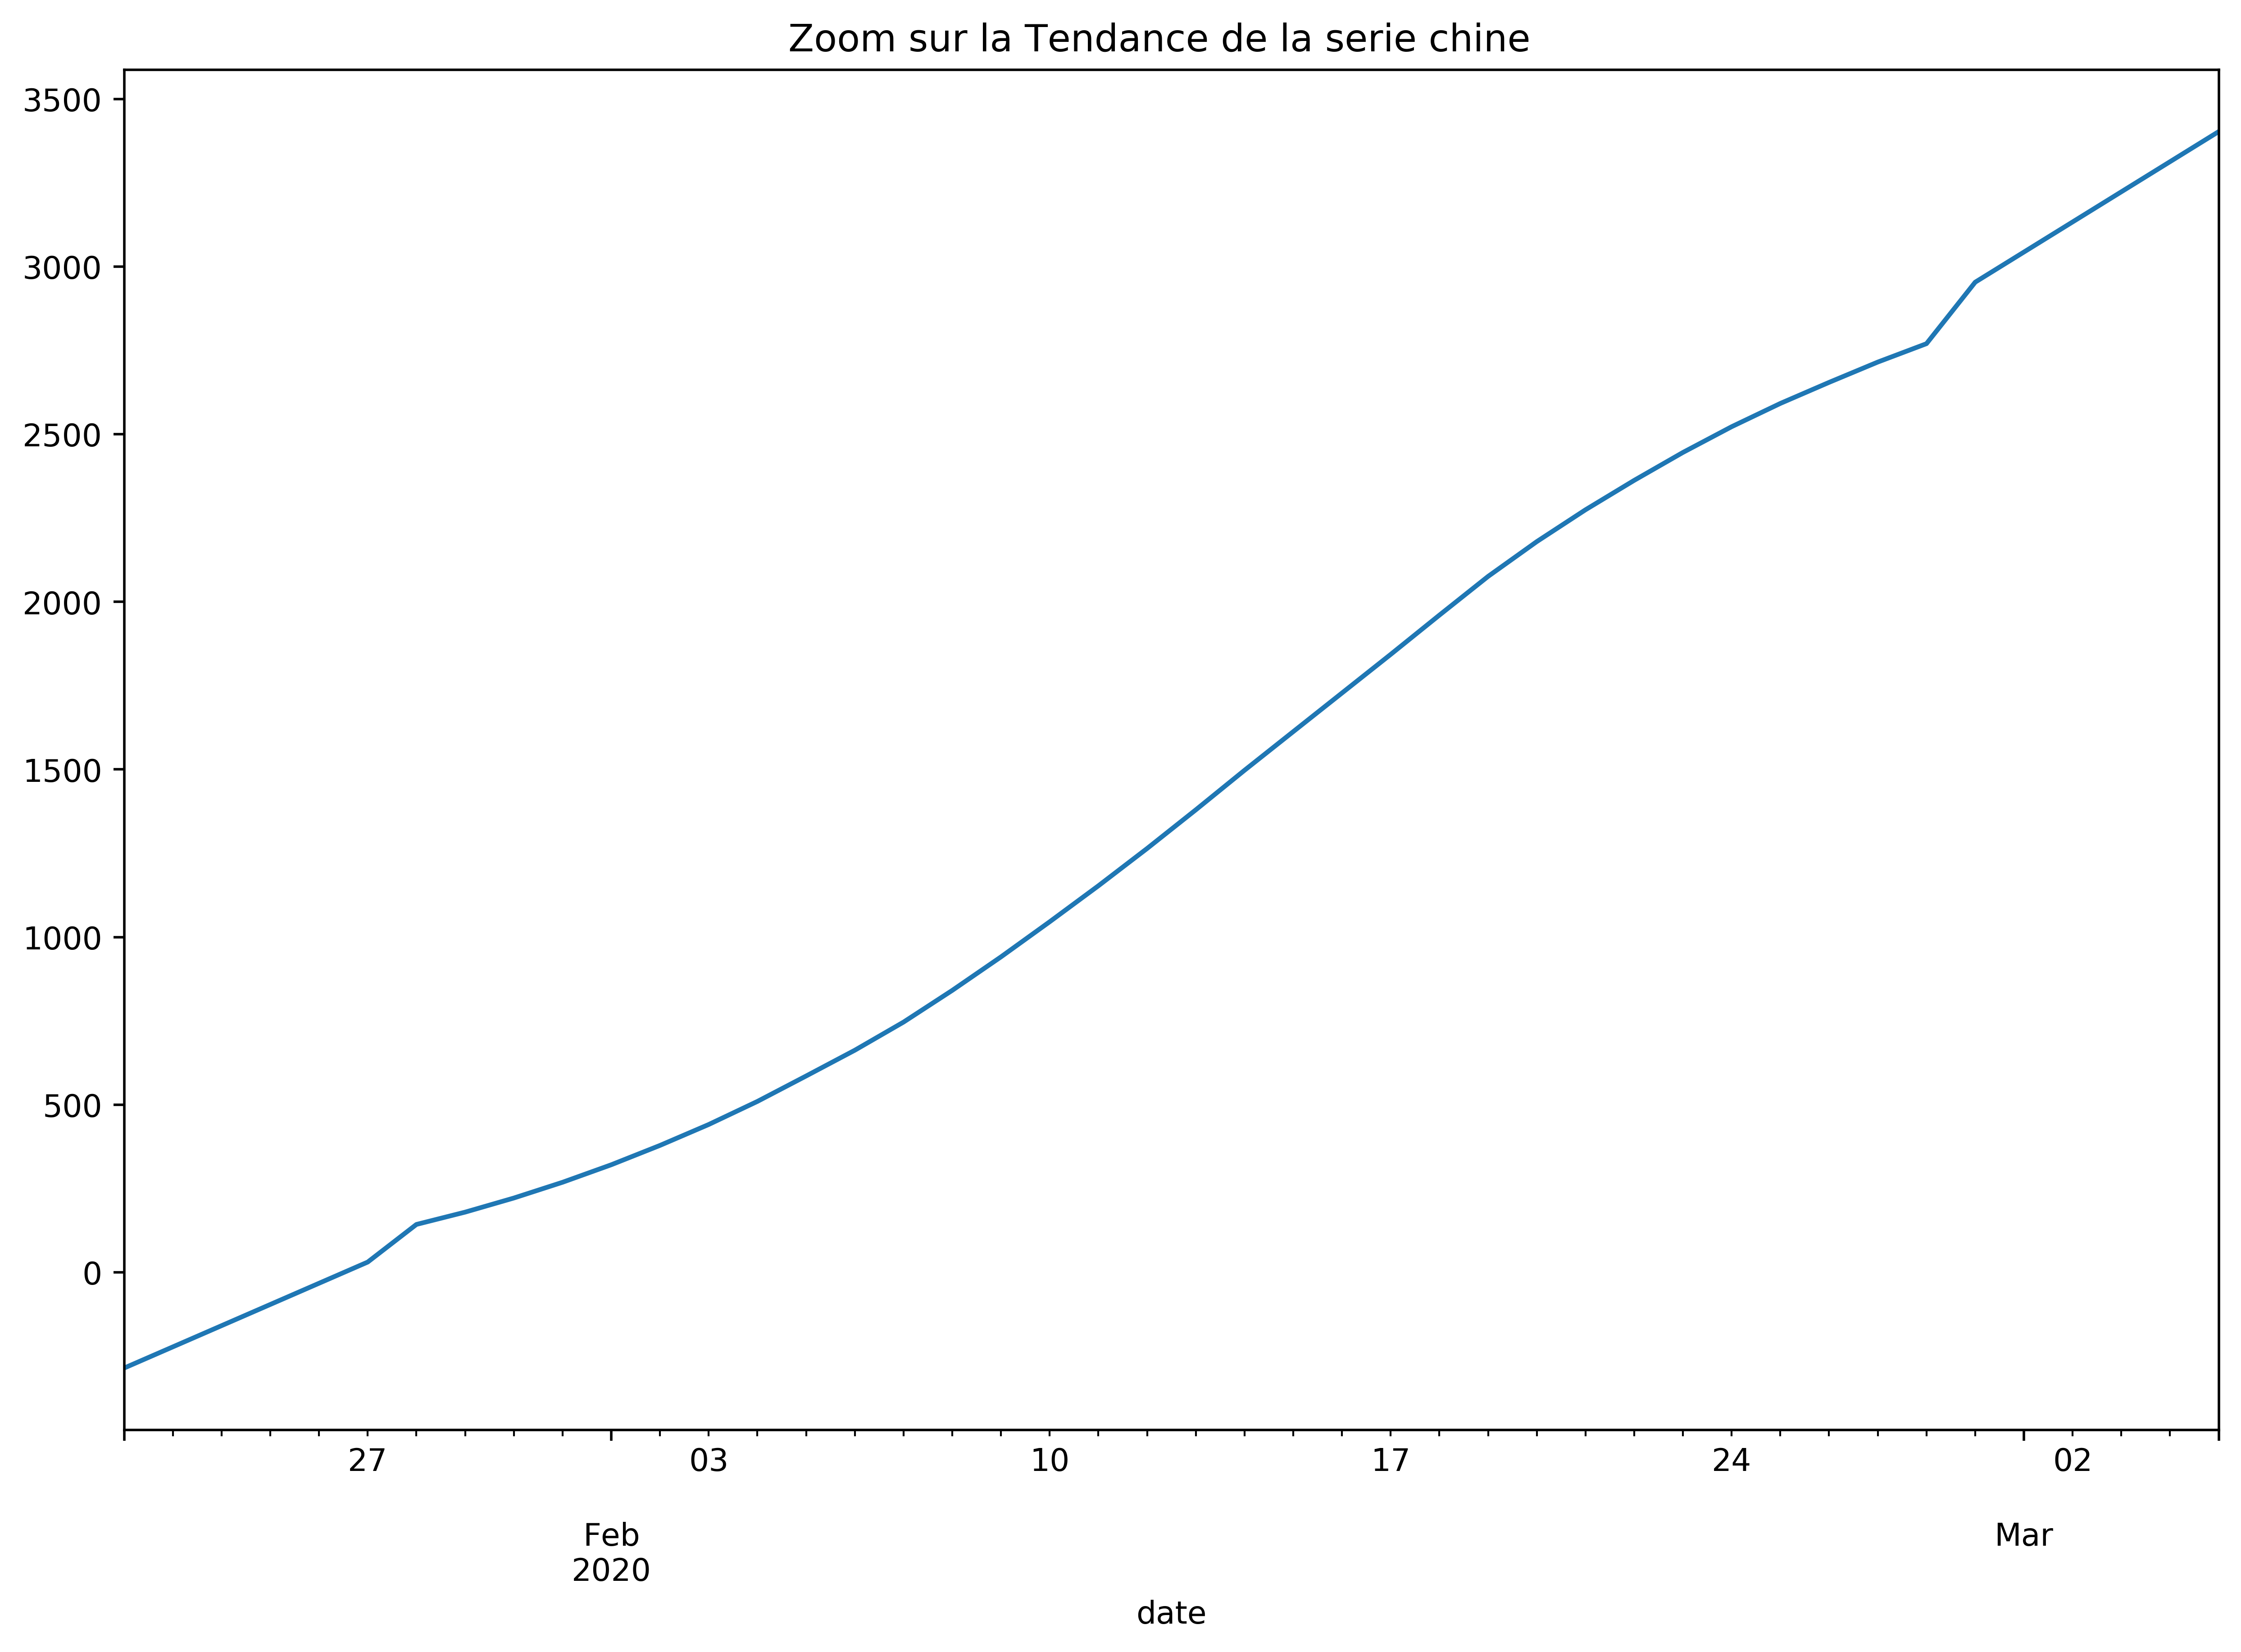

In [11]:
plt.figure(figsize=(12,8),dpi=500)
decomposition.trend.plot()
plt.title("Zoom sur la Tendance de la serie chine  ")
plt.savefig("Zoom sur la Tendance de la serie chine  ")
plt.show()

# Modeling with Auto Regressive Integrated Moving Average (ARIMA) processes

                             ARIMA Model Results                              
Dep. Variable:        D.target_China    No. Observations:                   43
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  71.094
Method:                       css-mle   S.D. of innovations              0.046
Date:                Thu, 19 Mar 2020   AIC                           -134.189
Time:                        16:40:49   BIC                           -127.144
Sample:                    01-23-2020   HQIC                          -131.591
                         - 03-05-2020                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0528      0.023      2.270      0.023       0.007       0.098
ar.L1.D.target_China      0.9202      0.075     12.338      0.000       0.774       1.066
ma.L1.D.

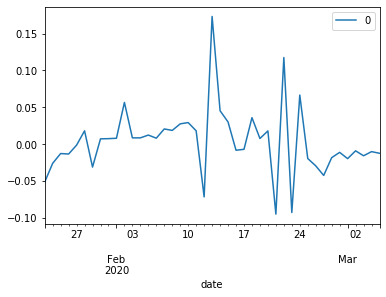

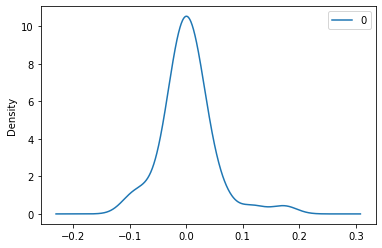

               0
count  43.000000
mean    0.003105
std     0.046684
min    -0.095394
25%    -0.017359
50%     0.006938
75%     0.018139
max     0.173348


In [31]:
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.arima_model import ARIMA
# fit model
model = ARIMA(cov['target_China '], order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [ ]:
# Normalisation
cov['target_China '] = (cov['target_China '] - np.mean(cov['target_China '])) / np.std(cov['target_China '])

                             ARIMA Model Results                              
Dep. Variable:        D.target_China    No. Observations:                   43
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  71.094
Method:                       css-mle   S.D. of innovations              0.046
Date:                Thu, 19 Mar 2020   AIC                           -134.189
Time:                        16:45:20   BIC                           -127.144
Sample:                    01-23-2020   HQIC                          -131.591
                         - 03-05-2020                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0528      0.023      2.270      0.023       0.007       0.098
ar.L1.D.target_China      0.9202      0.075     12.338      0.000       0.774       1.066
ma.L1.D.

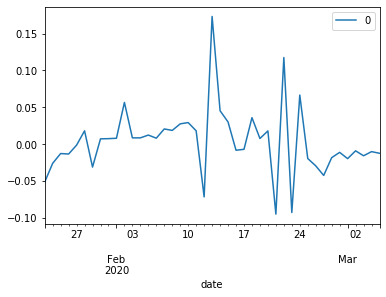

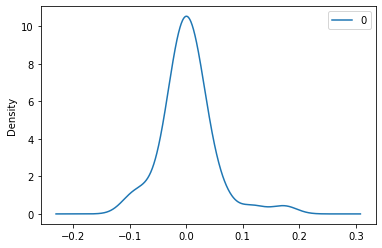

               0
count  43.000000
mean    0.003105
std     0.046684
min    -0.095394
25%    -0.017359
50%     0.006938
75%     0.018139
max     0.173348


In [41]:
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.arima_model import ARIMA
# fit model
model = ARIMA(cov['target_China '], order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [64]:
from sklearn.metrics import mean_squared_error
X = cov['target_China '].values
size = int(len(X) * 0.80)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(1,1,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot


predicted=1.232016, expected=1.208312
predicted=1.279464, expected=1.235121
predicted=1.305126, expected=1.275796
predicted=1.344965, expected=1.319245
predicted=1.373877, expected=1.351601
predicted=1.401475, expected=1.390427
predicted=1.438322, expected=1.420934
predicted=1.465447, expected=1.454214
predicted=1.496894, expected=1.483796
Test MSE: 0.001


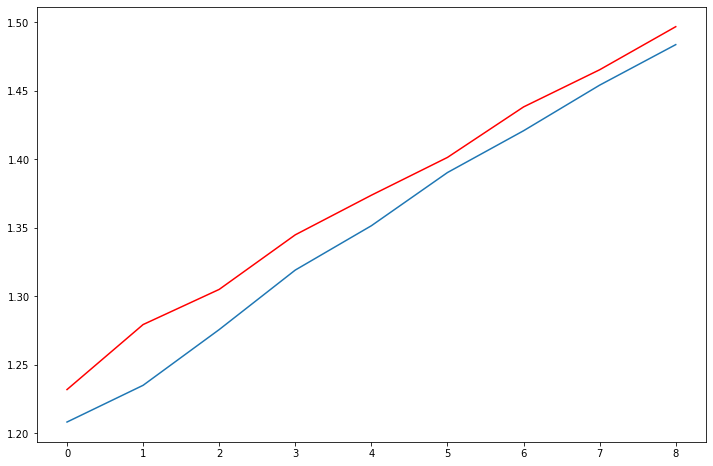

In [44]:
plt.figure(figsize=(12,8))
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

# Prédiction avec le jeu de données train entier

In [102]:
from sklearn.metrics import mean_squared_error
X = cov['target_China '].values
size = int(len(X))
train= X[0:size]
history = [x for x in train]
predictions1 = list()
for t in range(len(train)):
    model = ARIMA(history, order=(1,1,1),)
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions1.append(yhat)
    obs = train[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(train, predictions1)
print('Test MSE: %.3f' % error)
# plot

predicted=1.524235, expected=-1.287688
predicted=-1.909427, expected=-1.286764
predicted=-1.372184, expected=-1.279368
predicted=-1.323498, expected=-1.264577
predicted=-1.217937, expected=-1.251635
predicted=-1.267603, expected=-1.227599
predicted=-1.236271, expected=-1.182301
predicted=-1.184538, expected=-1.180452
predicted=-1.181269, expected=-1.145324
predicted=-1.143540, expected=-1.106497
predicted=-1.102858, expected=-1.063972
predicted=-1.058892, expected=-0.969679
predicted=-0.961552, expected=-0.910515
predicted=-0.901234, expected=-0.849501
predicted=-0.839113, expected=-0.782941
predicted=-0.771313, expected=-0.718230
predicted=-0.705534, expected=-0.639653
predicted=-0.625400, expected=-0.559226
predicted=-0.543489, expected=-0.466781
predicted=-0.449185, expected=-0.367866
predicted=-0.348305, expected=-0.275421
predicted=-0.254343, expected=-0.270799
predicted=-0.252074, expected=-0.037839
predicted=-0.011024, expected=0.102676
predicted=0.132482, expected=0.233947
pred

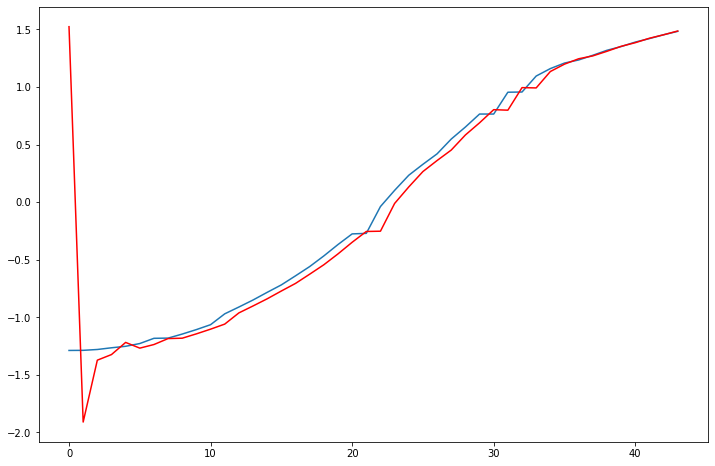

In [98]:
plt.figure(figsize=(12,8))
plt.plot(train)
plt.plot(predictions1, color='red')
plt.show()